In [1]:
#!/usr/bin/env python
# Copyright (c) 2020 - The Procedural Generation for Gazebo authors
# For information on the respective copyright owner see the NOTICE file
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
import os
from tqdm import tqdm
import geopandas as gpd
import argparse
import datetime
from pcg_gazebo.simulation import SimulationModel, \
    add_custom_gazebo_resource_path
from pcg_gazebo.generators.creators import extrude
from pcg_gazebo.generators.shapes import random_rectangles, \
    random_rectangle, random_points_to_triangulation, rectangle
from pcg_gazebo.generators import WorldGenerator
from shapely.ops import unary_union
from shapely.geometry import shape, Polygon, MultiPolygon, box
from trimesh.creation import extrude_polygon


/Users/asmazzeo/Documents/UTN/Proyecto FInal/Frontier-Exploration-with-a-prior/venv/lib/python3.9/site-packages/tqdm/std.py:989: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  total = len(iterable)


  0%|                                                                                           | 0/170 [00:00<?, ?it/s]/Users/asmazzeo/Documents/UTN/Proyecto FInal/Frontier-Exploration-with-a-prior/venv/lib/python3.9/site-packages/tqdm/std.py:1195: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for obj in iterable:
100%|██████████████████████████████████████████████████████████████████████████████| 170/170 [00:00<00:00, 16087.53it/s]


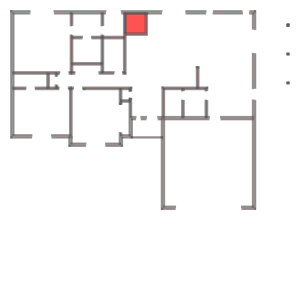

In [2]:
x_room_range = 50
y_room_range = 50
n_rectangles = 10
wall_thickness = 0.1
wall_height = 5
world_name = "rect_falop"

block_size = 1
from shapely.geometry import Polygon

def line_to_wall(line):
    x, y = line.coords.xy
    return box(x[0], y[0], x[1]+1, y[1]+1)
print("==============================")
# wall_polygon = random_rectangles(
#     n_rect=n_rectangles,
#     x_center_min=-x_room_range / 2.,
#     x_center_max=x_room_range / 2.,
#     y_center_min=-y_room_range / 2.,
#     y_center_max=y_room_range / 2.,
#     delta_x_min=x_room_range / 2.,
#     delta_x_max=x_room_range,
#     delta_y_min=y_room_range / 2.,
#     delta_y_max=y_room_range)
# Create a world generator to place
# objects in the world
world_generator = WorldGenerator()
polygons = []
layout = gpd.read_file(f"{os.getcwd()}/files/small_house_clean.dxf")

wall_polygon = layout.convex_hull

for line in tqdm(wall_polygon.unary_union):
    polygons.append(line_to_wall(line))

multi_poly = MultiPolygon(polygons)
# Create the wall model based on the extruded
# boundaries of the polygon
walls_model_list = []
for polygon in polygons:
    x_pose = (polygon.bounds[2]-polygon.bounds[0])/2
    y_pose = (polygon.bounds[3]-polygon.bounds[1])/2
    walls_model_list.append(extrude(
        polygon=polygon,
        thickness=wall_thickness,
        height=wall_height,
        pose=[x_pose, y_pose, wall_height / 2., 0, 0, 0],
        extrude_boundaries=False,
        color='xkcd'))
counter = 0
for model in walls_model_list:
    counter += 1
    model.name = str(counter) + '_walls'
    world_generator.world.add_model(
    tag=model.name,
    model=model)


# Add walls and ground plane to the world
# world_generator.world.add_model(
#     tag=walls_model.name,
#     model=walls_model)

# wall_polygon = layout.convex_hull[101]

# walls_model = extrude(
#     polygon=wall_polygon,
#     thickness=wall_thickness,
#     height=wall_height,
#     pose=[0, 0, wall_height / 2., 0, 0, 0],
#     extrude_boundaries=True,
#     color='xkcd')
# walls_model.name = world_name + '_walls'

# Add walls and ground plane to the world

multi_poly

In [3]:
world_generator.world.add_model(
    tag='ground_plane',
    model=SimulationModel.from_gazebo_model('ground_plane'))

# # Retrieve the free space polygon where objects
# # can be placed within the walls
# free_space_polygon = world_generator.world.get_free_space_polygon(
#     ground_plane_models=[walls_model.name],
#     ignore_models=['ground_plane'])

'ground_plane'

In [4]:
world_generator.world.name = world_name
world_generator.world.show()

KeyboardInterrupt: 

In [ ]:
# # Export world to file and walls model as Gazebo model
# export_models_dir = "/home/agusmazzeo/.gazebo/models"
# export_world_dir = "/home/agusmazzeo/.gazebo/worlds"

# add_custom_gazebo_resource_path(export_models_dir)

# full_world_filename = world_generator.export_world(
#     output_dir=export_world_dir,
#     filename=world_generator.world.name + '.world',
#     models_output_dir=export_models_dir,
#     overwrite=True)

# print('World file: {}'.format(full_world_filename))